In [ ]:
!pip install emoji

     |████████████████████████████████| 174 kB 8.8 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=5d16cfe351d69204f04727832a6239b597e013c2be0bbe9af8fa296c1506f688
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [ ]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

In [ ]:

def dadosSeparados(linha):
    #01/11/2020 15:25 - Exemplo: Oi, eu sou o Exemplo

    data_search = re.search("(\d{2})(\/)(\d{2})(\/)(\d{4})", linha)
    data = data_search.group()

    hora_search = re.search("(\d{2}):(\d{2})", linha)
    hora = hora_search.group()

    #para o autor estamos pegando a string que está entre "- " e ": "
    autor_search = re.search("(?<=\-\s)(.*?)(?=\:\s)", linha)
    autor= autor_seach.group()
    
    mensagem_search = re.search("(?<=\:\s).*", linha)
    if mensagem_search is None:
        mensagem = ""
    else:
        mensagem = mensagem_search.group()

    return data, hora, autor, mensagem

In [ ]:

def dadosSeparados(linha):
    #01/11/2020 15:25 - Exemplo: Oi, eu sou o Exemplo

    data_search = re.search("(\d{2})(\/)(\d{2})(\/)(\d{4})", linha)
    data = data_search.group()

    hora_search = re.search("(\d{2}):(\d{2})", linha)
    hora = hora_search.group()

    #para o autor estamos pegando a string que está entre "- " e ": "
    autor_search = re.search("(?<=\-\s)(.*?)(?=\:\s)", linha)
    if autor_search is None:
        autor = None
    else:
        autor = autor_search.group()
    
    mensagem_search = re.search("(?<=\:\s).*", linha)
    if mensagem_search is None:
        mensagem = ""
    else:
        mensagem = mensagem_search.group()

    return data, hora, autor, mensagem

In [ ]:

def iniciaDataHora(s):
    padrao = '^(\d{2})(\/)(\d{2})(\/)(\d{4}) (\d{2}):(\d{2})[ ]? -' 
    resultado = re.match(padrao, s)
    if resultado:
        return True
    return False

In [ ]:
dadoAnalisado = []
textofernanda=[]
textojuliano=[]
conversationPath = "/content/drive/MyDrive/Conversa do WhatsApp com Fernanda.txt"
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline()
    mensagemBuffer = [] 
    data, hora, autor, mensagem = None, None, None, ""
    while True:
        linha = fp.readline() 
        if not linha: 
            break
        linha = linha.strip() 
        if iniciaDataHora(linha):
            if len(mensagem) > 0: 
                dadoAnalisado.append([data, hora, autor, mensagem])
                if autor=="Fernanda":
                  textofernanda.append(mensagem )
                if autor=="Juliano":
                  textojuliano.append(mensagem )


            data, hora, autor, mensagem = dadosSeparados(linha)

In [ ]:
textof=" ".join([str(n) for n in textofernanda])
textof
textoj=" ".join([str(n) for n in textojuliano])
textoj

'Oxe Faz é tempo Não no carro mesmo bom dia baby kkk que mais tarde 8 h ei o curso é bom viu de web uhum eu tb mainha tomou 500 ml hj disse que era pra acordar ficar ativa 👏👏👏👏👏👏 Quanto oi amor oi tava fazendo o almoço acho interessante fazer algo que a pessoa chega faz com tesão oque? <Arquivo de mídia oculto> gustavo que fez ficou top eu sabia da pra usar os dois zaps no computador um no navegador e outro no app Iae Boa noite Oi, amor é um curso ah mas esse da o certificado ou é o curso gratis e o certificado caro a vera é o curso é gratis o caro é o certificado é barato pro cara caras que pagam 10k de dol por ano em faculdade pequena/media vermelho ou azul amo tu tb oi <Arquivo de mídia oculto> https://youtu.be/M2AzJkEY8Pg Bom dia baby Baby Tá com raiva ? Kkkkkk Eita Oi amor Vim pegar mainha <Arquivo de mídia oculto> Kkkk Eu vim Tava cara de doid9 <Arquivo de mídia oculto> Te amp Só tu mesmo viu Obrigado <Arquivo de mídia oculto> Tô indo <Arquivo de mídia oculto> <Arquivo de mídia o

In [ ]:

df = pd.DataFrame(dadoAnalisado, columns=['data', 'hora', 'autor', 'mensagem'])
df["data"] = pd.to_datetime(df["data"])

In [ ]:
dfdia=df.groupby(by=["autor",'data']).count()

In [ ]:

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI_PORTUGUESE for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["mensagem"].apply(split_count)

URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.mensagem.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [ ]:

total_mensagens = df.shape[0]
media_mensagens = df[df['mensagem'] == '<Arquivo de mídia oculto>'].shape[0]
emojis = sum(df['emoji'].str.len())
links = np.sum(df.urlcount)

print("Contagem geral dos dados do grupo: ")
print("Mensagem:",total_mensagens)
print("Mídia:",media_mensagens)
print("Emojis:",emojis)
print("Links:",links)

Contagem geral dos dados do grupo: 
Mensagem: 5827
Mídia: 862
Emojis: 297
Links: 42


In [ ]:

media_mensagens_df = df[df['mensagem'] == '<Arquivo de mídia oculto>']
mensagens_df = df.drop(media_mensagens_df.index)

apagadas_mensagens_df = mensagens_df[mensagens_df['mensagem'] == 'Essa mensagem foi apagada']
mensagens_df = mensagens_df.drop(apagadas_mensagens_df.index)

mensagens_df['cont_letras'] = mensagens_df['mensagem'].apply(lambda s : len(s))
mensagens_df['cont_palavras'] = mensagens_df['mensagem'].apply(lambda s : len(s.split(' ')))
mensagens_df["cont_mensagem"]=1
mensagens_df["cont_emoji"]= df['emoji'].str.len()
mensagens_df.head()

,data,hora,autor,mensagem,emoji,urlcount,cont_letras,cont_palavras,cont_mensagem,cont_emoji
0,2021-08-31,18:16,Fernanda,Aguardando mensagem,[],0,19,2,1,0
1,2021-08-31,18:16,Fernanda,Aguardando mensagem,[],0,19,2,1,0
2,2021-08-31,18:16,Fernanda,Aguardando mensagem,[],0,19,2,1,0
3,2021-08-31,18:37,Juliano,Oxe,[],0,3,1,1,0
5,2021-08-31,18:48,Fernanda,Viu,[],0,3,1,1,0


In [ ]:

# Cria uma lista com os autores únicos
l = mensagens_df.autor.unique()

for i in range(len(l)):
  # Filtra mensagens de um autor específico
  req_df = mensagens_df[mensagens_df["autor"] == l[i]]
  
  print(f'Estatísticas de {l[i]}')
  print('Mensagens enviadas:', req_df.shape[0])

  # cont_palavras contém o total de palavras por mensagem. Soma de todas palavras
  palavras_por_mensagem = (np.sum(req_df['cont_palavras']))/req_df.shape[0]
  print('Palavras por mensagem:', palavras_por_mensagem)
  
  media = media_mensagens_df[media_mensagens_df['autor'] == l[i]].shape[0]
  print('Mensagens de mídia enviadas:', media)

  emojis = sum(req_df['emoji'].str.len())
  print('Emojis enviados:', emojis)

  links = sum(req_df["urlcount"])   
  print('Links enviados:', links)
    
  print()

Estatísticas de Fernanda
Mensagens enviadas: 3331
Palavras por mensagem: 4.14440108075653
Mensagens de mídia enviadas: 451
Emojis enviados: 202
Links enviados: 27

Estatísticas de Juliano
Mensagens enviadas: 1634
Palavras por mensagem: 3.0893512851897187
Mensagens de mídia enviadas: 411
Emojis enviados: 95
Links enviados: 15



In [ ]:
a=mensagens_df[["data","autor","cont_palavras","cont_mensagem"]].groupby(["data","autor"]).sum()
a.fillna(0)
a=a.reset_index(level=1)
k=a["autor"].unique()


for i in k:
 print(a[a["autor"]==i].describe())

       cont_palavras  cont_mensagem
count     150.000000     150.000000
mean       92.033333      22.206667
std        65.939917      13.691861
min         1.000000       1.000000
25%        50.000000      13.000000
50%        82.500000      21.000000
75%       123.750000      29.000000
max       508.000000      96.000000
       cont_palavras  cont_mensagem
count     139.000000     139.000000
mean       36.316547      11.755396
std        30.273879       8.223192
min         1.000000       1.000000
25%        17.000000       6.000000
50%        28.000000      10.000000
75%        44.500000      15.000000
max       215.000000      48.000000


NameError: ignored

In [ ]:

dicionario_f = {'Bom dia' : len(re.findall('bom di', textof, re.IGNORECASE))}
dicionario_f['Boa noite'] = len(re.findall('boa n', textof, re.IGNORECASE))
dicionario_f['cheguei'] = len(re.findall('che', textof, re.IGNORECASE))
dicionario_f['Te amo'] = len(re.findall('amo', textof, re.IGNORECASE))

dicionario_j = {'Bom dia' : len(re.findall('bom d', textoj, re.IGNORECASE))}
dicionario_j['Boa noite'] = len(re.findall('boa n', textoj, re.IGNORECASE))
dicionario_j['cheguei'] = len(re.findall('cheg', textoj, re.IGNORECASE))
dicionario_j['Te amo'] = len(re.findall('amo', textoj, re.IGNORECASE))

dicionario_f = sorted(dicionario_f.items(), key=lambda x: x[1], reverse=True)
carinhosf = pd.DataFrame(dicionario_f, columns=['Carinhos', 'cont'])
dicionario_j = sorted(dicionario_j.items(), key=lambda x: x[1], reverse=True)
carinhosj = pd.DataFrame(dicionario_j, columns=['Carinhos', 'cont'])

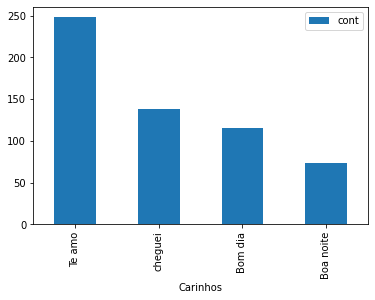

In [ ]:
carinhosf.plot(x="Carinhos",y="cont",kind='bar')

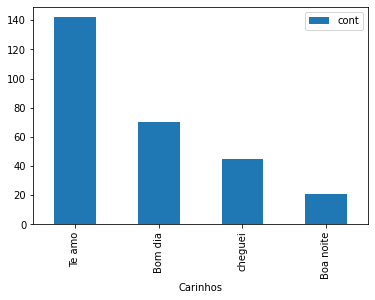

In [ ]:
carinhosj.plot(x="Carinhos",y="cont",kind='bar')

In [ ]:
dfdia